# Human Development (United Nations Development Programme | UNDP)
### 2019 June 12
`Cameron.Cn`
## TEST CODE & NOTES
---
<div class="alert-block alert-info">
<b>NOTE:</b>This is just a test document, it is the "intial draft" and location for data exposition. <br>
    All documents, unless noted, are in C\: Documents\AdvDataCourse-2019\project_hdi <br>
    Original copies of the dataset are marked with "bkup_*" just in case of accident.
</div>

### Data @ UNDP

    
**UNDP HDI** | http://hdr.undp.org/en/content/human-development-index-hdi

**Dashboard** | http://hdr.undp.org/en/data#

**Data KEY** | http://hdr.undp.org/en/content/human-development-indicators-and-indices-2018-statistical-update-readers-guide


In [1]:
# importing common libraries to deal with datasets
import pandas as pd
import numpy as np

In [2]:
# opening the datafile for HDI (Human Development Index) | CSV
hdiloc = "un_hdi_data.csv"
hdata = pd.read_csv(hdiloc, encoding="ansi") # the file is not UTF-8, which is Pandas' default 
# the initial data has a "title row," it is necessary to discard this row. I did so manually in a text editor.

hdata.head()

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [19]:
# renaming the first column to something easier
hdata.rename(columns={'HDI Rank (2017)':'hdiRank','Country':'countryName'}, inplace = True)
hdata.head()

,hdiRank,countryName,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [4]:
# there are a lot of NaN values--which is understandable, considering the newness
# of data projects such as this internationally. Wars make data collection hard!

# importing some visualizations
from matplotlib import pyplot as pyp
import seaborn as sns
%matplotlib inline

In [24]:
# but our data will be hard to work with in this format! dates along the columns
# make it difficult to show temporal relations
# To that end, I will have to shape it a little...


# using pandas 'melt' to switch places 
# source | StackOverflow #28654127
tall = hdata.melt(id_vars=["countryName","hdiRank"], # takes the columns I want to KEEP 
           var_name="Date", # makes a new name for the top row replacement
           value_name="HDI") # new name for the values of the cells (what was present)

In [27]:
tall.head()

,countryName,hdiRank,Date,HDI
0,Afghanistan,168,1990,NaN
1,Albania,68,1990,0.645
2,Algeria,85,1990,0.577
3,Andorra,35,1990,NaN
4,Angola,147,1990,NaN


In [26]:
len(tall) # looking at how long this new, TALLer table is!

5292

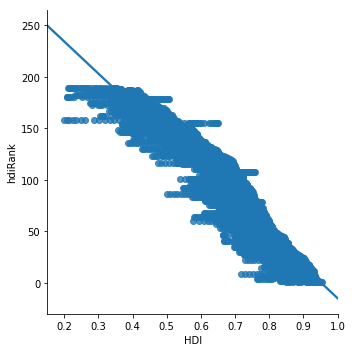

In [38]:
# trying our hand now at simple line plots
sns.lmplot(x='HDI',y='hdiRank',data=tall)
# of course, each country is in here many times!
# So this is a USELESS chart!

In [46]:
# going to remove NaN entries (we can remove the entire row)
# this will allow us to actually use the dataset!

tall_full = tall.dropna(subset=['HDI']) # drops rows where HDI is null

In [47]:
tall_full.head() # looking at the top of the data.. looks good

,countryName,hdiRank,Date,HDI
1,Albania,68,1990,0.645
2,Algeria,85,1990,0.577
6,Argentina,47,1990,0.704
7,Armenia,83,1990,0.631
8,Australia,3,1990,0.866


In [48]:
len(tall_full) # how many entries were del- Five hundred!

4757

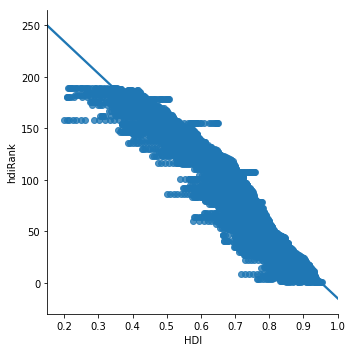

In [59]:
# does that change our chart? (Also note these are not useful axes)
sns.lmplot(x='HDI',y='hdiRank',data=tall_full)

# A: Not really...still 27 "Germany" entries!

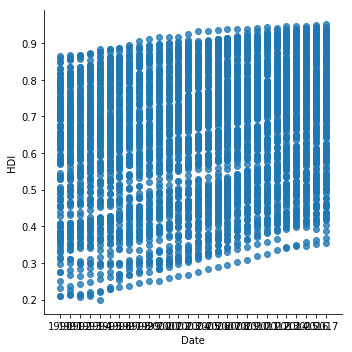

In [58]:
sns.lmplot(x='Date', y='HDI', data=tall_full, 
           fit_reg=False)

In [67]:
# can we follow one country over time? What would that look like?
sns.swarmplot(x='Afghanistan', y='HDI', data=tall_full,) # how syntax to?

ValueError: Could not interpret input 'Afghanistan'